## Load/Clean/Preprocess Data

In [1]:
import pandas as pd
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

In [4]:
import re

In [5]:
import scipy.stats as stats

In [91]:
import researchpy as rp
import seaborn as sns
from statsmodels.formula.api import ols

In [7]:
df = pd.read_csv('Cognitive Science Experiment.csv')

In [8]:
def map_colors(x):
    # map colors to experimental vs. control group
    if x == 'Blå':
        return 'Control'
    return 'Experimental'

def lang_code(x):
    if x == 'Yes':
        return 'DK'
    return 'L2'

df['Group'] = df['Please pick a color'].apply(map_colors)
df['Danish as'] = df['Are you a native speaker of Danish?'].apply(lang_code)
df

,Timestamp,Please pick a color,Please read the text above to the best of your ability. Have you read it?,Please read the text above to the best of your ability. Have you read it?.1,"Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?",Hvad sætter Michael pris på ved træningen?,Hvad synes Michaels kone om hans træning?,Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?,Hvor var Michaels første ironman?,Hvor gammel er Michael nu?,...,What is your age?,What is/are your native language(s)? (Can be more than one),Germanic Language - native (not English),"Have you studied/learned any other languages, if yes, please state which?","If so, what other language(s) have you studied/learned?",Germanic Language - L2 (not English),Total # of additional Languages besides DK & ENG,What is your highest level of education?,Group,Danish as
0,5/15/2019 18:26:02,Blå,NaN,I have read,"Hans sønner ville gerne have, at han brugte me...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det,i et år,Sverige,38,...,Under 18,English,No,Yes,Spanish,No,1.0,Bachelor's Degree or equivalent,Control,DK
1,5/17/2019 11:26:10,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...","Ved ikke (kan enten ikke huske det, eller det ...",Hun bryder sig ikke om det.,I et år.,Spanien,48,...,Under 18,"Danish, and Russian",Yes,Yes,"German, English, Latvian, Russian",Yes,4.0,High school or less,Control,DK
2,5/17/2019 15:06:47,Blå,NaN,I have read it.,Han fik mulighed for at løbe sammen med nogle ...,At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,Danish,Yes,Yes,English and German,Yes,1.0,Master's Degree +,Control,DK
3,5/17/2019 15:32:02,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,English,No,Yes,"Sanskrit, Latin, Ancient Greek, French",No,4.0,Bachelor's Degree or equivalent,Control,L2
4,5/18/2019 8:05:29,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,At det er sejt.,I et år.,Spanien,48,...,18-24,Danish,Yes,Yes,"English, German",Yes,1.0,Bachelor's Degree or equivalent,Control,DK
5,5/18/2019 10:22:48,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",48,...,18-24,German,Yes,Yes,"English, Latin",No,1.0,Bachelor's Degree or equivalent,Control,L2
6,5/19/2019 8:44:30,Grøn,I have read it.,NaN,"Hans sønner ville gerne have, at han brugte me...",At den foregår sammen med hans venner.,"Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...","Ved ikke (kan enten ikke huske det, eller det ...",...,18-24,Slovak,No,Yes,NaN,No,1.0,High school or less,Experimental,L2
7,5/19/2019 8:47:51,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,"Hun var ikke vildt med det i starten, men nu s...",I ti år.,Spanien,48,...,45-54,Danish,Yes,Yes,"English, German, some Swedish, Norwegian, Fren...",Yes,6.0,Bachelor's Degree or equivalent,Experimental,DK
8,5/19/2019 8:57:27,Blå,NaN,I have read it.,"Han kunne nemmere holde op med at ryge, når ha...",At den foregår sammen med hans venner.,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,English,No,No,NaN,No,0.0,Master's Degree +,Control,L2
9,5/19/2019 8:57:38,Grøn,I have read it.,NaN,"Han kunne nemmere holde op med at ryge, når ha...",At den giver ham mere overskud til at være sam...,Hun bryder sig ikke om det.,I et år.,Spanien,48,...,25-34,Danish and English,Yes,Yes,German,Yes,2.0,Bachelor's Degree or equivalent,Experimental,DK


#### Clean up free-text field responses

In [9]:
def clean_langs(string):
    string = ''.join([x for x in string if re.match(r'[\w\s]', x)])
    if 'Dansk' in string:
        return 'Danish'
    if 'Tysk' in string:
        return 'German'
    return string

In [10]:
# make function to split languages into lists where applicable, then we can get counts of native languages

In [11]:
Counter(df['What is/are your native language(s)? (Can be more than one)'].str.title().str.strip().apply(clean_langs))

Counter(df['If so, what other language(s) have you studied/learned?'].dropna().str.title().str.strip().apply(clean_langs))

set(df['What school did you study in? (e.g. Studieskolen)'].str.title().str.strip())

{'Cbs',
 'Clavis',
 'Hellerup Sprogcenter',
 'Hellerup Sprogskole',
 'I Switched Between Helsingør, Hellerup And Lyngby School, And Were In Each Only For A Short Time.',
 'Ia',
 'Ia Sprog',
 'Ia Sprog, Studieskolen',
 'Københavns Sprogcenter',
 'Leardansk',
 'Næstved Sprogskole',
 'Private Teacher, Stydieskolen, Clavis',
 'Public Language Center',
 'Speak School Of Danish',
 'Sprogcenter Aalborg',
 'Sprogcenter Hellerup',
 'Sprogskole',
 'Sprogskolen',
 'Sprogskolen, Hvidovre Gymnasium',
 'Studieskolen',
 'Studieskolen, Kbh Sprogcenter',
 'Studieskolen, Sprogcenter Hellerup',
 'Studieskolen/ Clavis',
 'University And Studieskolen',
 'Vestegnen Sprog Og Kompetence Center (Vsk)',
 'Vuf',
 nan}

In [12]:
level_map = {0: 6, 1:5, 2:4, 3:3, 4:2, 5:1}

In [13]:
danish_level_list = [
    'Can understand with ease virtually everything heard or read.',
'Can understand a wide range of demanding, longer texts, and recognise implicit meaning.',
'Can understand the main ideas of complex text on both concrete and abstract topics, including technical discussions in his/her field of specialisation.',
'Can understand the main points of clear standard input on familiar matters regularly encountered in work, school, leisure, etc.',
'Can understand sentences and frequently used expressions related to areas of most immediate relevance (e.g. very basic personal and family information, shopping, local geography, employment).',
'Can understand and use familiar everyday expressions and very basic phrases aimed at the satisfaction of needs of a concrete type.'
    ]

danish_level_dict = {x:i for i, x in enumerate(danish_level_list)}

In [14]:
def get_danish_level_num(ans):
    if isinstance(ans, float):
        return
    return level_map[danish_level_dict[ans]]

df['Mapped Danish Level_1'] = df['Which of these statements best describes your Danish understanding?'].apply(get_danish_level_num)

In [15]:
df.columns

Index(['Timestamp', 'Please pick a color',
       'Please read the text above to the best of your ability. Have you read it?',
       'Please read the text above to the best of your ability. Have you read it?.1',
       'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?',
       'Hvad sætter Michael pris på ved træningen? ',
       'Hvad synes Michaels kone om hans træning? ',
       'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?',
       'Hvor var Michaels første ironman?', 'Hvor gammel er Michael nu?',
       'Hvornår vil Michael stoppe med at løbe?',
       'Hvordan er stemningen i teksten?',
       'Are you a native speaker of Danish?',
       'Have you studied Danish in a language school?',
       'What school did you study in? (e.g. Studieskolen)',
       'What was your last level learned? (e.g. level 3.1, level A2)',
       'Mapped Danish Level',
       'Which of these statements be

In [16]:
danish_level_list = [
    'Can summarise information from different spoken and written sources, reconstructing arguments and accounts in a coherent presentation.',
'Can express him/herself fluently and spontaneously without much obvious searching for expressions.',
'Can interact with a degree of fluency and spontaneity that makes regular interaction with native speakers quite possible without strain for either party.',
'Can deal with most situations likely to arise whilst travelling in an area where the language is spoken.',
'Can communicate in simple and routine tasks requiring a simple and direct exchange of information on familiar and routine matters.',
'Can introduce him/herself and others and can ask and answer questions about personal details such as where he/she lives, people he/she knows and things he/she has.'
    ]

danish_level_dict = {x:i for i, x in enumerate(danish_level_list)}

In [17]:
def get_danish_level_num(ans):
    if isinstance(ans, float):
        return
    return level_map[danish_level_dict[ans]]

df['Mapped Danish Level_2'] = df['Which of these statements best describes your Danish communication?'].apply(get_danish_level_num)

In [18]:
danish_level_list = [
    'Can express him/herself spontaneously, very fluently and precisely, differentiating finer shades of meaning even in more complex situations.',
'Can use language flexibly and effectively for social, academic and professional purposes. Can produce clear, well-structured, detailed text on complex subjects, showing controlled use of organisational patterns, connectors and cohesive devices.',
'Can produce clear, detailed text on a wide range of subjects and explain a viewpoint on a topical issue giving the advantages and disadvantages of various options.',
'Can produce simple connected text on topics which are familiar or of personal interest. Can describe experiences and events, dreams, hopes & ambitions and briefly give reasons and explanations for opinions and plans.',
'Can describe in simple terms aspects of his/her background, immediate environment and matters in areas of immediate need.',
'Can interact in a simple way provided the other person talks slowly and clearly and is prepared to help.'
    ]

danish_level_dict = {x:i for i, x in enumerate(danish_level_list)}
danish_level_dict

{'Can express him/herself spontaneously, very fluently and precisely, differentiating finer shades of meaning even in more complex situations.': 0,
 'Can use language flexibly and effectively for social, academic and professional purposes. Can produce clear, well-structured, detailed text on complex subjects, showing controlled use of organisational patterns, connectors and cohesive devices.': 1,
 'Can produce clear, detailed text on a wide range of subjects and explain a viewpoint on a topical issue giving the advantages and disadvantages of various options.': 2,
 'Can produce simple connected text on topics which are familiar or of personal interest. Can describe experiences and events, dreams, hopes & ambitions and briefly give reasons and explanations for opinions and plans.': 3,
 'Can describe in simple terms aspects of his/her background, immediate environment and matters in areas of immediate need.': 4,
 'Can interact in a simple way provided the other person talks slowly and cl

In [19]:
def get_danish_level_num(ans):
    if isinstance(ans, float):
        return
    return level_map[danish_level_dict[ans]]

df['Mapped Danish Level_3'] = df['Which of these additional statements best describes your Danish communication?'].apply(get_danish_level_num)

In [20]:
# get average of 3 answers to calculate score and update df with the score
df.loc[(np.isnan(df['Mapped Danish Level']) == True), 'Mapped Danish Level'] = df[['Mapped Danish Level_3','Mapped Danish Level_2','Mapped Danish Level_3']].mean(axis=1)


Make dict of correct answers:

In [21]:
q_a = {
    'Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?':'Han kunne nemmere holde op med at ryge, når han trænede.',
    'Hvad sætter Michael pris på ved træningen? ': 'At den foregår sammen med hans venner.',
    'Hvad synes Michaels kone om hans træning? ': 'Hun bryder sig ikke om det.',
    'Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?': 'I et år.',
    'Hvor var Michaels første ironman?' : 'Spanien',
    'Hvor gammel er Michael nu?' : '48',
    'Hvornår vil Michael stoppe med at løbe?' : 'Han vil aldrig stoppe.'
    
}

In [22]:
df_control = df[df['Group'] == 'Control']

In [23]:
df_experiment = df[df['Group'] == 'Experimental']

In [24]:
df_danes = df[df['Are you a native speaker of Danish?'] == 'Yes']
df_L2 = df[df['Are you a native speaker of Danish?'] == 'No']
len(df_danes), len(df_L2)

(60, 45)

In [25]:
df_control_danes = df[(df['Group'] == 'Control') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_experiment_danes = df[(df['Group'] == 'Experimental') & (df['Are you a native speaker of Danish?'] == 'Yes')]
df_control_L2 = df[(df['Group'] == 'Control') & (df['Are you a native speaker of Danish?'] == 'No')]
df_experiment_L2 = df[(df['Group'] == 'Experimental') & (df['Are you a native speaker of Danish?'] == 'No')]

In [26]:
len(df_control_danes)

26

In [27]:
len(df_control_L2)

23

In [28]:
len(df_experiment_danes)

34

In [29]:
len(df_experiment_L2)

22

In [30]:
df.groupby('Please pick a color').count()

,Timestamp,Please read the text above to the best of your ability. Have you read it?,Please read the text above to the best of your ability. Have you read it?.1,"Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt?",Hvad sætter Michael pris på ved træningen?,Hvad synes Michaels kone om hans træning?,Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman?,Hvor var Michaels første ironman?,Hvor gammel er Michael nu?,Hvornår vil Michael stoppe med at løbe?,...,"Have you studied/learned any other languages, if yes, please state which?","If so, what other language(s) have you studied/learned?",Germanic Language - L2 (not English),Total # of additional Languages besides DK & ENG,What is your highest level of education?,Group,Danish as,Mapped Danish Level_1,Mapped Danish Level_2,Mapped Danish Level_3
Please pick a color,,,,,,,,,,,,,,,,,,,,,
Blå,49,0,49,49,49,49,49,49,49,49,...,49,47,49,49,49,49,49,6,6,6
Grøn,56,54,0,56,56,56,56,56,56,56,...,56,55,55,55,56,56,56,4,4,4


### Preliminary Demographic Plots

In [31]:
ax = df.groupby(['Group' ])['Please pick a color'].count()

Text(0.5, 1.0, 'Counts of Control vs. Experimental Groups')

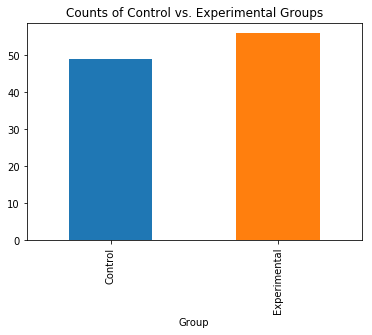

In [32]:
ax.plot.bar(stacked=True)

plt.title('Counts of Control vs. Experimental Groups')

Danish as     DK  L2
Group               
Control       26  23
Experimental  34  22


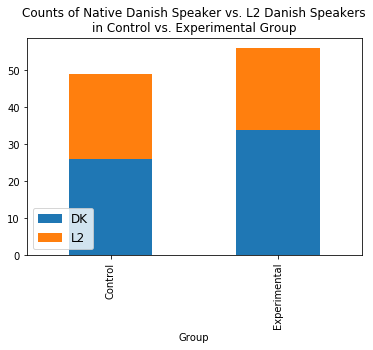

In [33]:
ax = df.groupby(['Group','Danish as'])['Please pick a color'].count()
print (ax.unstack())

ax = ax.unstack().plot.bar(stacked=True, title='Counts of Native Danish Speaker vs. L2 Danish Speakers\nin Control vs. Experimental Group')
ax.legend(loc=3, fontsize=12)

In [34]:
df.corr()
#todo: add subject accuracy scores to original dataframe
# add number of years in denmark as numeric variable

,Mapped Danish Level,Total # of additional Languages besides DK & ENG,Mapped Danish Level_1,Mapped Danish Level_2,Mapped Danish Level_3
Mapped Danish Level,1.000000,-0.009950,0.880373,0.914065,0.977079
Total # of additional Languages besides DK & ENG,-0.009950,1.000000,0.410755,0.566558,0.194441
Mapped Danish Level_1,0.880373,0.410755,1.000000,0.868628,0.826648
Mapped Danish Level_2,0.914065,0.566558,0.868628,1.000000,0.806776
Mapped Danish Level_3,0.977079,0.194441,0.826648,0.806776,1.000000


### Calculate Accuracies

In [35]:
results_df = pd.DataFrame(columns=['Question','Control', 'Experimental'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_control[df[q] == a])
    experiment_correct = len(df_experiment[df[q] == a])
    control_incorrect = len(df_control[df[q] != a])
    experiment_incorrect = len(df_experiment[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_control))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_df.loc[i] = [q, (control_correct/len(df_control)),(experiment_correct/len(df_experiment))]
    i+=1
    
results_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 42 # incorrect: 7  percent correct: 0.8571428571428571
Experimental group:
 # correct: 46 # incorrect: 10  percent correct: 0.8214285714285714
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 34 # incorrect: 15  percent correct: 0.6938775510204082
Experimental group:
 # correct: 40 # incorrect: 16  percent correct: 0.7142857142857143
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 21 # incorrect: 28  percent correct: 0.42857142857142855
Experimental group:
 # correct: 22 # incorrect: 34  percent correct: 0.39285714285714285
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 34 # incorrect: 15  percent correct: 0.693877

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control,Experimental
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.857143,0.821429
1,Hvad sætter Michael pris på ved træningen?,0.693878,0.714286
2,Hvad synes Michaels kone om hans træning?,0.428571,0.392857
3,Hvor lang tid trænede Michael at svømme crawl ...,0.693878,0.750000
4,Hvor var Michaels første ironman?,0.897959,0.910714
5,Hvor gammel er Michael nu?,0.959184,0.910714
6,Hvornår vil Michael stoppe med at løbe?,0.612245,0.607143


### Subject-by-subject Accuracy

#### Mean subject level scores

In [36]:
results_subj_df = pd.DataFrame(columns=['Group', 'Score', 'Danish Level'])
i = 0
for subj in df.to_dict(orient='records'):
    num_correct = 0
    num_correct = sum([1 for q, a in q_a.items() if a == subj[q]]) 
    score = num_correct/7
    results_subj_df.loc[i] = [subj['Group'], score, subj['Mapped Danish Level']]
    i+=1
    
results_subj_df.groupby('Group').mean()

,Score,Danish Level
Group,,
Control,0.734694,3.985507
Experimental,0.729592,3.616667


In [37]:
control = results_subj_df[df.Group== 'Control']
experimental = results_subj_df[df.Group== 'Experimental']

In [38]:
Counter([(d['Score'], d['Danish Level'])for d in control.to_dict('records') if math.isnan(d['Danish Level']) is False])

Counter({(1.0, 4.666666666666667): 1,
         (0.7142857142857143, 5.0): 2,
         (1.0, 5.0): 2,
         (0.5714285714285714, 2.0): 1,
         (0.8571428571428571, 5.0): 4,
         (1.0, 3.0): 1,
         (0.42857142857142855, 3.0): 1,
         (0.7142857142857143, 4.666666666666667): 1,
         (0.2857142857142857, 2.0): 1,
         (0.5714285714285714, 5.0): 1,
         (0.42857142857142855, 2.0): 1,
         (0.7142857142857143, 4.0): 2,
         (0.7142857142857143, 6.0): 1,
         (0.7142857142857143, 3.3333333333333335): 1,
         (0.8571428571428571, 4.0): 1,
         (0.8571428571428571, 1.0): 1,
         (0.7142857142857143, 3.0): 1})

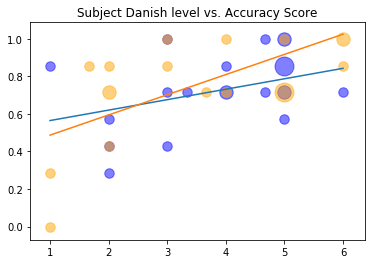

In [39]:
control_dps = []
experiment_dps = []
for scores, count in Counter([(d['Danish Level'], d['Score'])for d in control.to_dict('records') if math.isnan(d['Danish Level']) is False]).items():
    plt.scatter(*scores, count*90, color='blue', alpha=0.5)
    control_dps.append(scores)
for scores, count in Counter([(d['Danish Level'], d['Score'])for d in experimental.to_dict('records') if math.isnan(d['Danish Level']) is False]).items():
    plt.scatter(*scores, count*90, color='orange', alpha=0.5)
    experiment_dps.append(scores)
plt.title('Subject Danish level vs. Accuracy Score')

x =[a[0] for a in control_dps]
y =[a[1] for a in control_dps]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
x =[a[0] for a in experiment_dps]
y =[a[1] for a in experiment_dps]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
# size indicates number of subjects with the same level/score combination. Color indicates
#plt.legend(['Control', 'Experimental'])

#### Histogram of Subject Scores by Control vs. Experimental Group

Text(0.5, 1.0, 'Distribution of Individual Subject Scores')

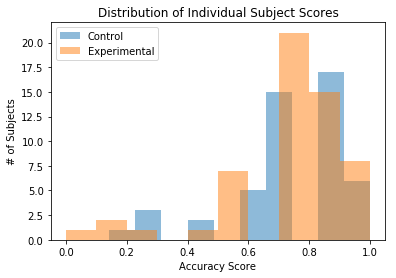

In [40]:
plt.hist(results_subj_df[results_subj_df['Group'] == 'Control']['Score'], bins=10, alpha=0.5)
plt.hist(results_subj_df[results_subj_df['Group'] == 'Experimental']['Score'], bins=10, alpha=0.5)
plt.legend(['Control', 'Experimental'])
plt.ylabel('# of Subjects')
plt.xlabel('Accuracy Score')
plt.title('Distribution of Individual Subject Scores')

## Can we do a t-test?

### Aggregate Accuracy level

levene pvalue 0.9083697636766654 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.5962563157081604 : test is not significant. the data is indicated to be normally distributed.


(0.9083697636766654, 0.5962563157081604)

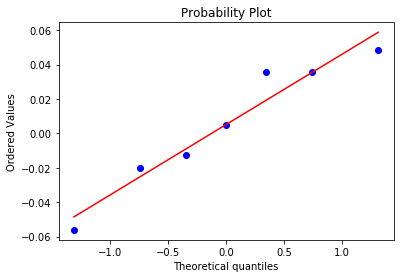

In [70]:
def test_stat_independence(col1, col2, col3=None, col4=None):
    if col3 is None:
        levene = stats.levene(col1, col2)
    elif col4 is None:
        levene = stats.levene(col1, col2, col3)
    else:
        levene = stats.levene(col1, col2, col3, col4)
    if levene.pvalue > 0.05:
        print('levene pvalue %s : test is not significant. there is homogeneity of variances and we can proceed.'%(levene.pvalue))
    else:
        print('levene pvalue %s : test is significant. there is NOT homogeneity of variances, so we cannot proceed.'%(levene.pvalue))
        return
    diff = col1 - col2
    stats.probplot(diff, plot= plt)
    shapiro = stats.shapiro(diff)[1]
    if shapiro > 0.05:
        print('shapiro pvalue %s : test is not significant. the data is indicated to be normally distributed.'%(shapiro))
    else:
        print('shapiro pvalue %s : test is significant. the data is NOT indicated to be normally distributed.'%(shapiro))
        return
    return levene.pvalue, shapiro
    
test_stat_independence(results_df['Control'], results_df['Experimental'])

## T-test

In [47]:
def ttest(col1, col2):
    ttest_result= stats.ttest_ind(col1, col2)
    if ttest_result.pvalue < 0.05:
        print('two-sided ttest p-value is less than 0.05: it is not by chance that the sample means are different')
    else:
        print('two-sided ttest p-value is not statistically significant')
    print('independent t-test p-value %s' %(ttest_result.pvalue))
    descriptives, results = rp.ttest(col1, col2)
    print(results)
    try:
        one_sided_ttest = results[results['Independent t-test'] == 'Mean of Control < mean of Experimental p value = ']['results'].values[0]
        print(one_sided_ttest)
        if one_sided_ttest < 0.05:
            print('one-sided ttest p-value is less than 0.05: it is not by chance that the sample means are different', one_sided_ttest)
        else:
            print('one-sided ttest p-value is not statistically significant', one_sided_ttest)
        return one_sided_ttest
    except:
        pass
          

### Aggregate Accuracy Level
#### Control vs. Experimental

In [48]:
ttest(results_df['Control'], results_df['Experimental'])

two-sided ttest p-value is not statistically significant
independent t-test p-value 0.9595258635315413
                                  Independent t-test  results
0             Difference (Control - Experimental) =    0.0051
1                              Degrees of freedom =   12.0000
2                                               t =    0.0518
3                           Two side test p value =    0.9595
4  Mean of Control > mean of Experimental p value =    0.5202
5  Mean of Control < mean of Experimental p value =    0.4798
6                                       Cohen's d =    0.0277
7                                       Hedge's g =    0.0259
8                                   Glass's delta =    0.0277
9                                               r =    0.0150
0.4798
one-sided ttest p-value is not statistically significant 0.4798


0.4798

### Subject Level ttest
#### Control vs. Experimental

levene pvalue 0.8417422234941734 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 1.0 : test is not significant. the data is indicated to be normally distributed.
two-sided ttest p-value is not statistically significant
independent t-test p-value 0.9006825861222456
                         Independent t-test   results
0             Difference (Score - Score) =     0.0051
1                     Degrees of freedom =   103.0000
2                                      t =     0.1251
3                  Two side test p value =     0.9007
4  Mean of Score > mean of Score p value =     0.5497
5  Mean of Score < mean of Score p value =     0.4503
6                              Cohen's d =     0.0245
7                              Hedge's g =     0.0243
8                          Glass's delta =     0.0253
9                                      r =     0.0123


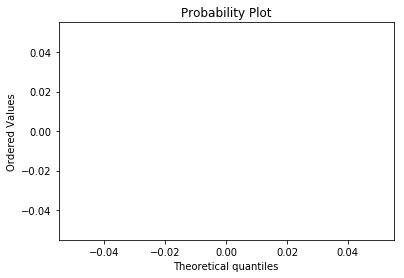

In [49]:
# split subject results into control and experimental
subj_control = results_subj_df[df.Group =='Control']
subj_experimental = results_subj_df[df.Group =='Experimental']
test_stat_independence(subj_control.Score, subj_experimental.Score)
ttest(subj_control.Score, subj_experimental.Score)
# todo: math question, does it make sense that the Aggregate and Subject level tests have the same means? i think it does...
# and does it make sense that they have different std deviations and p-values?

## ANOVA

Normality

Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality

Homogeneity of variance

Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation

Independent observations

In [64]:
l2_control = subj_control[np.isnan(subj_control['Danish Level']) == False]['Score']
l2_exper = subj_experimental[np.isnan(subj_experimental['Danish Level']) == False]['Score']
DK_control = subj_control[np.isnan(subj_control['Danish Level']) == True]['Score']
DK_exper = subj_experimental[np.isnan(subj_experimental['Danish Level']) == True]['Score']

In [93]:
l2_control

3     1.000000
5     0.714286
8     1.000000
10    0.571429
13    0.857143
15    1.000000
16    1.000000
20    0.428571
24    0.714286
26    0.714286
28    0.285714
30    0.571429
34    0.428571
36    0.857143
37    0.714286
38    0.714286
49    0.714286
52    0.857143
54    0.857143
56    0.857143
62    0.857143
64    0.714286
96    0.714286
Name: Score, dtype: float64

In [95]:
help(ols)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    drop_cols : array-like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.Eval

In [100]:
help(pd.DataFrame.dropna())

TypeError: dropna() missing 1 required positional argument: 'self'

In [97]:
groups_anova_df = pd.DataFrame([l2_control, l2_exper, DK_control, DK_exper],index=['l2_control', 'l2_exper', 'DK_control', 'DK_exper']).transpose()                                         
groups_anova_df.head()   

results = ols('l2_control ~ l2_exper', data=groups_anova_df,).fit()
results.summary()
                                                                          

ValueError: zero-size array to reduction operation maximum which has no identity

levene pvalue 0.7548282313261818 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 1.0 : test is not significant. the data is indicated to be normally distributed.


(0.7548282313261818, 1.0)

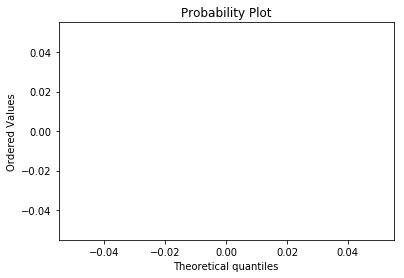

In [71]:
test_stat_independence(l2_control, l2_exper, DK_control, DK_exper)

In [66]:
stats.f_oneway(l2_control, l2_exper, DK_control, DK_exper)

F_onewayResult(statistic=0.08343898674541096, pvalue=0.9689219907521299)

In [50]:
results_lang_df = pd.DataFrame(columns=['Question','Control Danes', 'Experimental Danes', 'Control L2', 'Experimental L2'])
i = 0
for q, a in q_a.items():
    print(q, a)
    dk_control_correct = len(df_control_danes[df[q] == a])
    dk_experiment_correct = len(df_experiment_danes[df[q] == a])
    L2_control_correct = len(df_control_L2[df[q] == a])
    L2_experiment_correct = len(df_experiment_L2[df[q] == a])
    #control_incorrect = len(df_control_danes[df[q] != a])
    #experiment_incorrect = len(df_experiment_danes[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    #print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(control_correct, control_incorrect, (control_correct/len(df_control))))
    #print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
    #      %(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment)))
    results_lang_df.loc[i] = [q, round((dk_control_correct/len(df_control_danes)),3),round((dk_experiment_correct/len(df_experiment_danes)),3),round((L2_control_correct/len(df_control_L2)),3),round((L2_experiment_correct/len(df_experiment_L2)),3)]
    i+=1
    
results_lang_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Hvor var Michaels første ironman? Spanien
Hvor gammel er Michael nu? 48
Hvornår vil Michael stoppe med at løbe? Han vil aldrig stoppe.


/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Control Danes,Experimental Danes,Control L2,Experimental L2
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.923,0.971,0.783,0.591
1,Hvad sætter Michael pris på ved træningen?,0.769,0.676,0.609,0.773
2,Hvad synes Michaels kone om hans træning?,0.346,0.412,0.522,0.364
3,Hvor lang tid trænede Michael at svømme crawl ...,0.692,0.735,0.696,0.773
4,Hvor var Michaels første ironman?,0.885,0.941,0.913,0.864
5,Hvor gammel er Michael nu?,0.923,0.912,1.000,0.909
6,Hvornår vil Michael stoppe med at løbe?,0.538,0.559,0.696,0.682


In [51]:
results_danes_immigrant_df = pd.DataFrame(columns=['Question','Danes', 'Immigrants'])
i = 0
for q, a in q_a.items():
    print(q, a)
    control_correct = len(df_danes[df[q] == a])
    experiment_correct = len(df_L2[df[q] == a])
    control_incorrect = len(df_danes[df[q] != a])
    experiment_incorrect = len(df_L2[df[q] != a])
    #print(control_correct, control_incorrect, (control_correct/len(df_control)))
    #print(experiment_correct,experiment_incorrect, experiment_correct/len(df_experiment))
    print('Control group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(control_correct, control_incorrect, (control_correct/len(df_danes))))
    print('Experimental group:\n # correct: %s # incorrect: %s  percent correct: %s' 
          %(experiment_correct,experiment_incorrect, experiment_correct/len(df_L2)))
    results_danes_immigrant_df.loc[i] = [q, (control_correct/len(df_danes)),(experiment_correct/len(df_L2))]
    i+=1
    
results_danes_immigrant_df

Da Michael var 38 år, begyndte han at løbe længere distancer. Hvorfor begyndte han netop på det tidspunkt? Han kunne nemmere holde op med at ryge, når han trænede.
Control group:
 # correct: 57 # incorrect: 3  percent correct: 0.95
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.6888888888888889
Hvad sætter Michael pris på ved træningen?  At den foregår sammen med hans venner.
Control group:
 # correct: 43 # incorrect: 17  percent correct: 0.7166666666666667
Experimental group:
 # correct: 31 # incorrect: 14  percent correct: 0.6888888888888889
Hvad synes Michaels kone om hans træning?  Hun bryder sig ikke om det.
Control group:
 # correct: 23 # incorrect: 37  percent correct: 0.38333333333333336
Experimental group:
 # correct: 20 # incorrect: 25  percent correct: 0.4444444444444444
Hvor lang tid trænede Michael at svømme crawl før han gennemførte hans første ironman? I et år.
Control group:
 # correct: 43 # incorrect: 17  percent correct: 0.7166666666666667
Expe

/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sallyisa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sallyisa/anaconda3/lib/python

,Question,Danes,Immigrants
0,"Da Michael var 38 år, begyndte han at løbe læn...",0.950000,0.688889
1,Hvad sætter Michael pris på ved træningen?,0.716667,0.688889
2,Hvad synes Michaels kone om hans træning?,0.383333,0.444444
3,Hvor lang tid trænede Michael at svømme crawl ...,0.716667,0.733333
4,Hvor var Michaels første ironman?,0.916667,0.888889
5,Hvor gammel er Michael nu?,0.916667,0.955556
6,Hvornår vil Michael stoppe med at løbe?,0.550000,0.688889


levene pvalue 0.42721421548604366 : test is not significant. there is homogeneity of variances and we can proceed.
shapiro pvalue 0.17691588401794434 : test is not significant. the data is indicated to be normally distributed.


(0.42721421548604366, 0.17691588401794434)

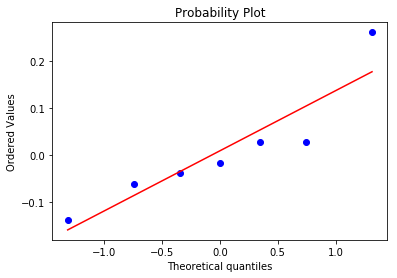

In [52]:
test_stat_independence(results_danes_immigrant_df['Danes'], results_danes_immigrant_df['Immigrants'])

In [53]:
ttest(results_danes_immigrant_df['Danes'], results_danes_immigrant_df['Immigrants'])

two-sided ttest p-value is not statistically significant
independent t-test p-value 0.9329360631457004
                              Independent t-test  results
0             Difference (Danes - Immigrants) =    0.0087
1                          Degrees of freedom =   12.0000
2                                           t =    0.0859
3                       Two side test p value =    0.9329
4  Mean of Danes > mean of Immigrants p value =    0.5335
5  Mean of Danes < mean of Immigrants p value =    0.4665
6                                   Cohen's d =    0.0459
7                                   Hedge's g =    0.0430
8                               Glass's delta =    0.0411
9                                           r =    0.0248


In [54]:
with open('results.tex','w') as rf:
    rf.write(results_df.to_latex(index=False))